| ![nsdf](https://www.sci.utah.edu/~pascucci/public/visoar-logo-tight.png)  | [ViSOAR](http://visoar.com/) [Jupyter notebook](https://jupyter.org/) <br> created by  [Valerio Pascucci](http://cedmav.com/) and  [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)  |  
|---|:---:|


# Distribution of the data related by the following book chapter: 

### Cahpter 1.18 - Retinal Connectomics 

__Authors:__  _[Bryan W. Jones](http://marclab.org/outreach/people/bryan-w-jones/), and [Robert E. Marc.](https://marclab.org/outreach/people/robert-e-marc/)_ 

__Published in:__  The Senses: A Comprehensive Reference, Elsevier, 2nd Edition - September 8, 2020, Pages 320-343, ISBN  9780128054086

https://www.elsevier.com/books/the-senses-a-comprehensive-reference/fritzsch/978-0-12-805408-6


#  <center> This is a preview of the 6.4 TB of EM data
![Connectomics EM Data](https://www.sci.utah.edu/~pascucci/public/RabbitRetinaEM.gif)

### <center>  Import modules and install them if missing. Check print message to see if the kernel should be restarted.

In [2]:
# import os,sys
# def restartkernel() :
#     display_html('''<script>Jupyter.notebook.kernel.restart(); 
#     //setTimeout(function(){IPython.notebook.execute_all_cells();
#     }, 100)</script>''',raw=True)

# try:
#     import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk
#     if pk.version.parse(gv.get_module_version(ov)[0]) < pk.version.parse("2.1.184"):
#         !"{sys.executable}" -m pip install matplotlib scikit-image getversion packaging --upgrade OpenVisus 
#         restartkernel()
# except:
#     !"{sys.executable}" -m pip install matplotlib scikit-image getversion packaging --upgrade OpenVisus 
#     from IPython.display import display_html
#     print()
#     print("************************************************************")
#     print("** Restarting jupyter kernel to use new modules installed **")
#     print("**          Evaluate all cells from the beginning.        **")
#     print("************************************************************")
#     restartkernel()

Starting OpenVisus C:\Users\Vlaerio's PC\AppData\Roaming\Python\Python37\site-packages\OpenVisus\__init__.py 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)] sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0) ...


In [ ]:
import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk, numpy as np

# <center> Connect to dataset and print basic information

In [3]:
RabbitRetinaEM=ov.LoadDataset('http://atlantis.sci.utah.edu/mod_visus?dataset=rabbit&cached=1')
print("Scalar fields names=",RabbitRetinaEM.getFields())
(X1,Y1),(X2,Y2) = RabbitRetinaEM.getLogicBox()
print("Dataset dimensions=",(X1,Y1),(X2,Y2))

Scalar fields names= ['EM']
Dataset dimensions= (0, 0) (131072, 131072)


# <center> Get a slice and display

Slice dimensions= 1024 1024


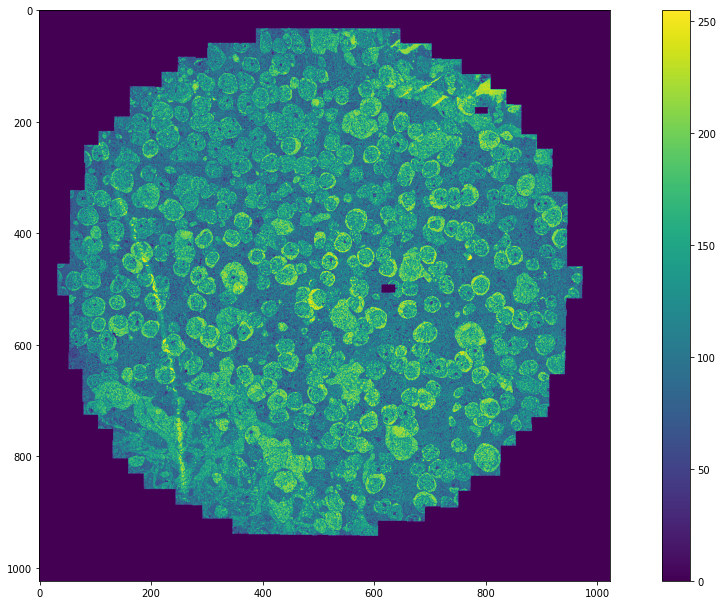

In [4]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice = RabbitRetinaEM.getXYSlice(resolution = -7,resample_output=False)
xSlice,ySlice = slice.shape
print("Slice dimensions=",xSlice,ySlice)
im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

In [5]:
print("Slice horizontal dim=",slice.shape[1],"Slice vertical dim=",slice.shape[0])

Slice horizontal dim= 1024 Slice vertical dim= 1024


# <center> Mark the area of interest in the slice

box= 60536 66536 63536 69536
box= 472.9375 519.8125 496.375 543.25


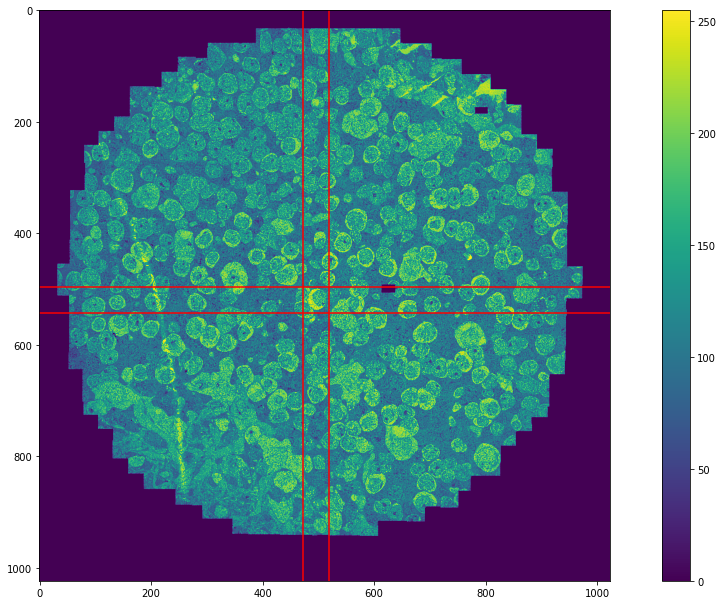

In [6]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice_size = X2-X1

# Parameters of the area of extract
x_size = 6000
y_size = 6000
x_min = slice_size//2 -5000
y_min = slice_size//2 -2000
x_max = x_min + x_size 
y_max = y_min + y_size 

scalingFactor = xSlice /slice_size
xx_min = x_min * scalingFactor
xx_max = x_max * scalingFactor 
yy_min = y_min * scalingFactor 
yy_max = y_max * scalingFactor 
print("box=",x_min,x_max,y_min,y_max)
print("box=",xx_min,xx_max,yy_min,yy_max)

slice = RabbitRetinaEM.getXYSlice(resolution = -7,resample_output=False)

plt.plot([0, 1024], [yy_min, yy_min], color = 'r')
plt.plot([0, 1024], [yy_max, yy_max], color = 'r')
plt.plot([xx_min, xx_min],[0, 1024],  color = 'r')
plt.plot([xx_max, xx_max],[0, 1024],  color = 'r')

im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

# <center> Extract and show the area of interest

Slice dimensions= 750 750


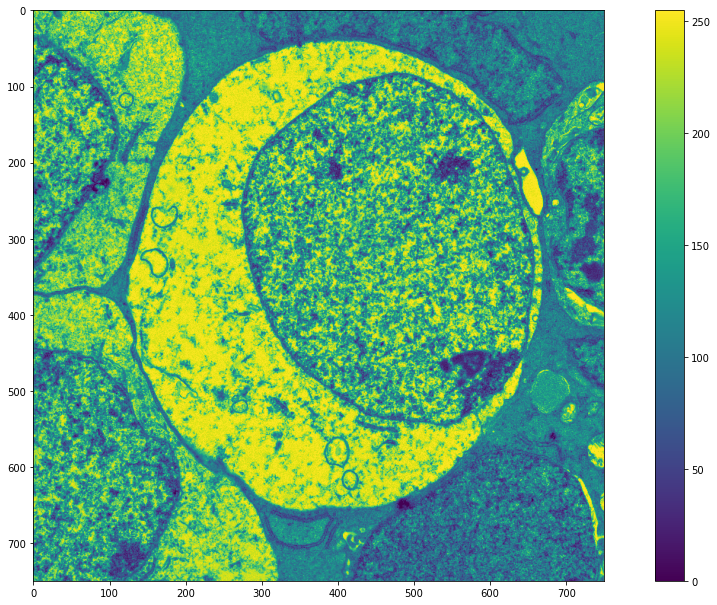

In [7]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

areaOfInterest = RabbitRetinaEM.getXYSlice(XY_MinMax=(x_min, x_max, y_min, y_max),time=1,resolution = -3,resample_output=False)
xAreaOfInterest,yAreaOfInterest = areaOfInterest.shape
print("Slice dimensions=",xAreaOfInterest,yAreaOfInterest)

im = plots.imshow(areaOfInterest) 
plt.colorbar(im)
plt.show()

In [8]:
%matplotlib notebook


<IPython.core.display.Javascript object>


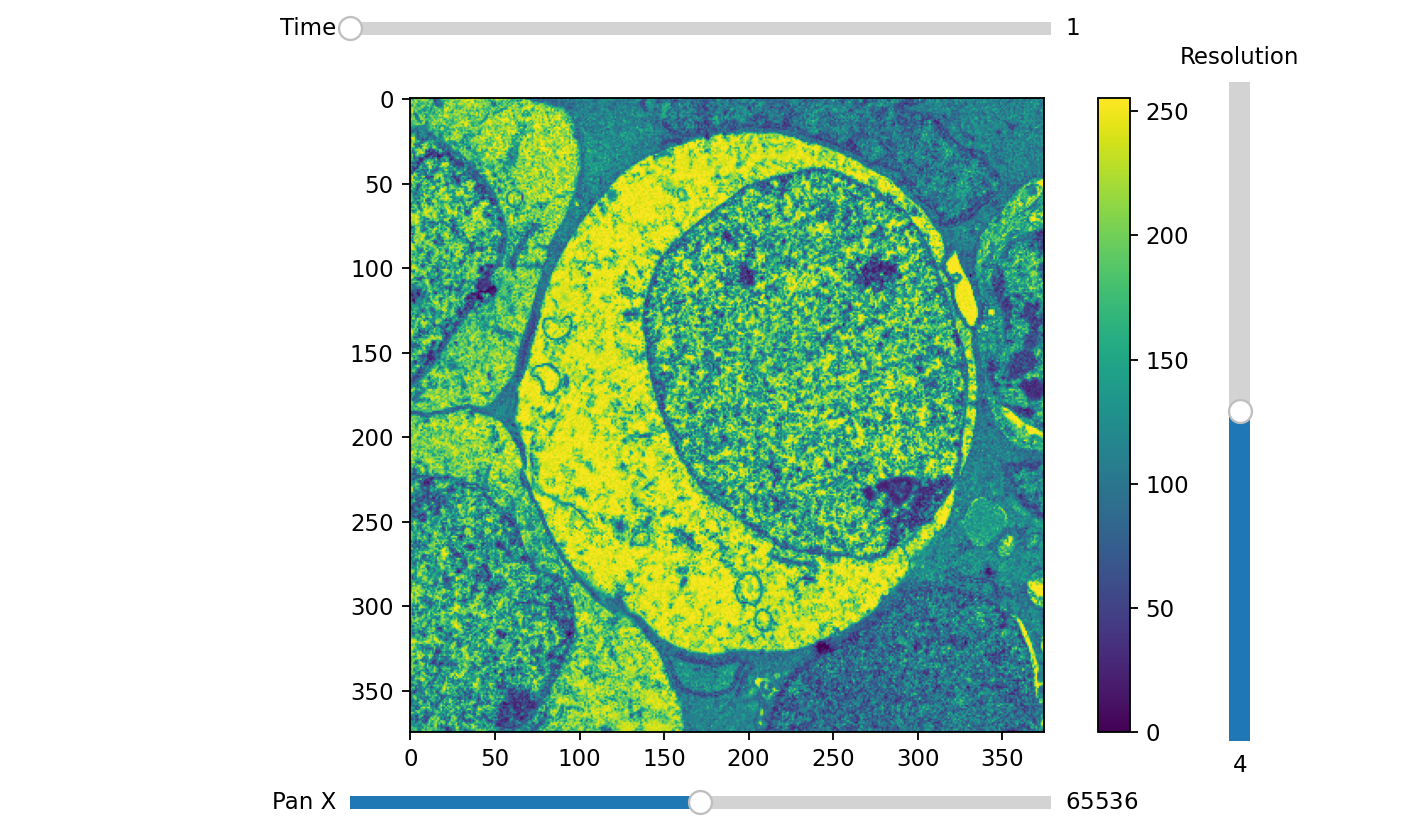

Slice dimensions= 375 375


In [9]:
from matplotlib.widgets import Slider, Button, RadioButtons
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8.5, 5)

sliceTime = 1
sliceResolution = -4
fig_size = 256
fig_xMin = x_min
fig_yMin = y_min


areaOfInterest = RabbitRetinaEM.getXYSlice(XY_MinMax=(x_min, x_max, y_min, y_max),time=sliceTime,resolution = -4,resample_output=False)

#areaOfInterest2 = RabbitRetinaEM.getXYSlice(XY_MinMax=(x_min, x_max, y_min, y_max),time=20,resolution = -4,resample_output=False)
xAreaOfInterest,yAreaOfInterest = areaOfInterest.shape
print("Slice dimensions=",xAreaOfInterest,yAreaOfInterest)

im = plots.imshow(areaOfInterest) 
plt.colorbar(im)

First_draw = True

def redraw(im = im):
    global First_draw
    fig_size1 = fig_size * 2**(-sliceResolution)
    areaOfInterest2 = RabbitRetinaEM.getXYSlice(XY_MinMax=(fig_xMin-fig_size1, fig_xMin+fig_size1, 
                                                           fig_yMin-fig_size1, fig_yMin+fig_size1),
                                                time=sliceTime,resolution = sliceResolution,resample_output=False)
    im.set_data(areaOfInterest2)
    if First_draw:
        First_draw = False
        fig.canvas.draw_idle()
    #fig.canvas.flush_events()


In [10]:
import time

import threading
import datetime


class TestThreading(object):
    global fig_xMin,fig_yMin,fig_size1,sliceTime,sliceResolution
    local_fig_xMin = fig_xMin
    local_fig_yMin = fig_yMin
    local_sliceTime = sliceTime
    local_i = 0
    #,fig_size1,sliceTime,sliceResolution

    def __init__(self, interval=0.1):
        self.interval = interval

        thread = threading.Thread(target=self.run, args=())
        thread.daemon = True
        thread.start()

    def run(self):
        global fig_xMin,fig_yMin,fig_size1,sliceTime,sliceResolution
        while True:
            self.local_i = self.local_i +1
            # More statements comes here
            #print(datetime.datetime.now().__str__() + ' : Start ',end = " \r")
            if  self.local_sliceTime != sliceTime:
                redraw()                

            print(self.local_i,end = " \r")

            time.sleep(self.interval)

tr = TestThreading()
#time.sleep(1)
#print(datetime.datetime.now().__str__() + ' : First output')
time.sleep(2)
#print(datetime.datetime.now().__str__() + ' : Second output')

In [11]:


axcolor = 'lightgoldenrodyellow'
# Making a horizontally oriented slider to
# control the time.
axpanx = plt.axes([0.25, 0.01, 0.5, 0.03], facecolor=axcolor)
panx_slider = Slider(
	ax=axpanx,
	label='Pan X',
	valmin=0,
	valmax=131072,
	valinit=131072//2,
	# orientation="horizontal" is Default
)

def updatePanx(val):
    global fig_xMin
    fig_xMin = int(val) 
    #redraw()

panx_slider.on_changed(updatePanx)
 
########################################################################################
# Making a horizontally oriented slider to
# control the time.
axtime = plt.axes([0.25, 0.95, 0.5, 0.03], facecolor=axcolor)
time_slider = Slider(
	ax=axtime,
	label='Time',
	valmin=1,
	valmax=10,
	valinit=sliceTime,
    valstep=[1,2,3,4,5,5,7,8,9,10]
	# orientation="horizontal" is Default
)

def updateTime(val):
    global sliceTime
    sliceTime = int(val)
    #redraw()

time_slider.on_changed(updateTime)
 
########################################################################################

# Making a horizontally oriented slider to
# control the time.
axres = plt.axes([0.87, 0.1, 0.03, 0.8], facecolor=axcolor)
res_slider = Slider(
	ax=axres,
	label='Resolution',
	valmin=0,
	valmax=8,
	valinit=-sliceResolution,
    valstep=[0,1,2,3,4,5,5,7,8],
	orientation="vertical" 
)

def updateRes(val):
    global sliceResolution
    sliceResolution = -int(val)
    #redraw()

res_slider.on_changed(updateRes)


plt.show()
fig.canvas.draw_idle()

--------------------------------------------------------------------------------------------------------------

======================================================================================

<IPython.core.display.Javascript object>


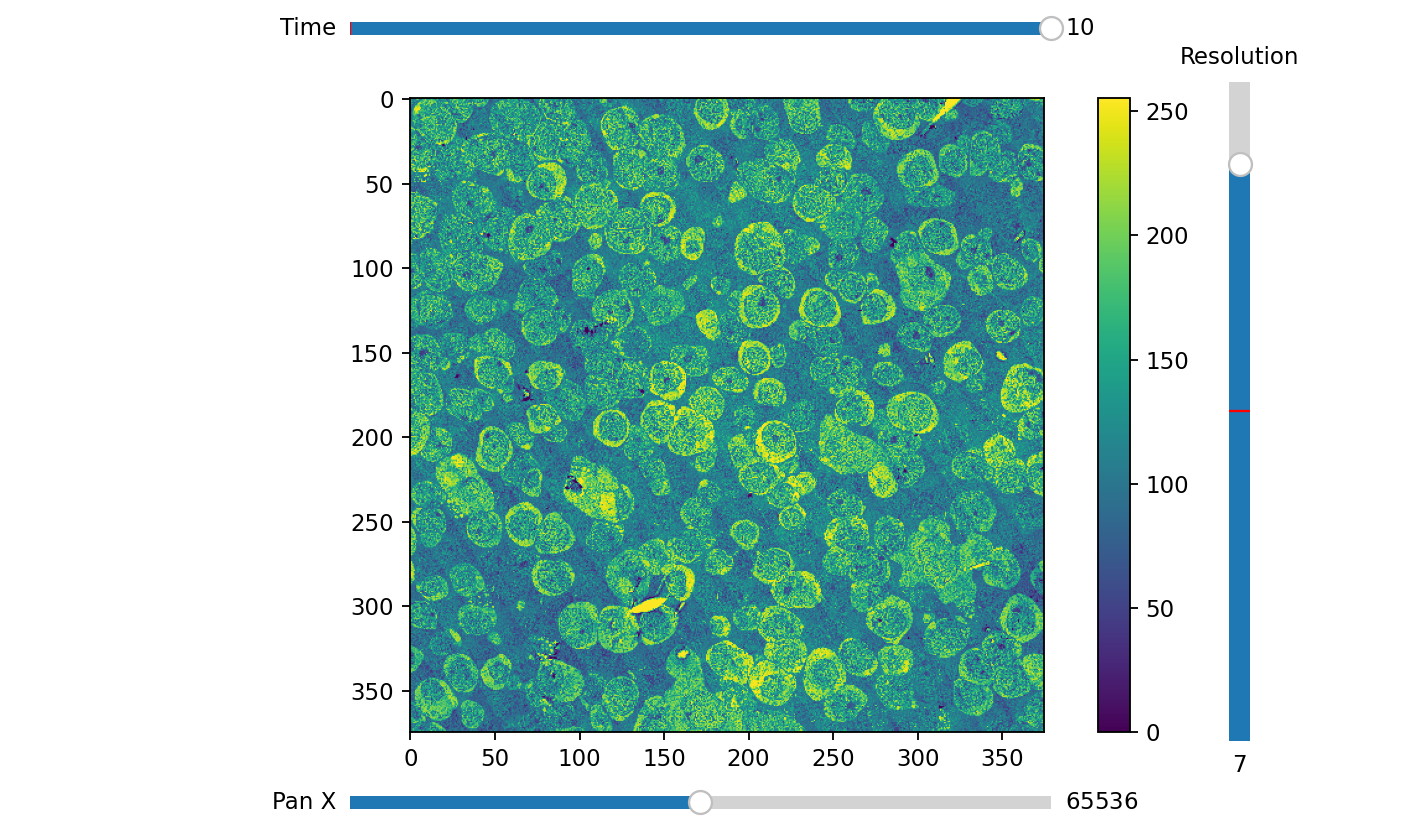

Slice dimensions= 375 375


In [12]:
from matplotlib.widgets import Slider, Button, RadioButtons
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8.5, 5)

sliceTime = 1
sliceResolution = -4
fig_size = 256
fig_xMin = x_min
fig_yMin = y_min


areaOfInterest = RabbitRetinaEM.getXYSlice(XY_MinMax=(x_min, x_max, y_min, y_max),time=sliceTime,resolution = -4,resample_output=False)

#areaOfInterest2 = RabbitRetinaEM.getXYSlice(XY_MinMax=(x_min, x_max, y_min, y_max),time=20,resolution = -4,resample_output=False)
xAreaOfInterest,yAreaOfInterest = areaOfInterest.shape
print("Slice dimensions=",xAreaOfInterest,yAreaOfInterest)

im = plots.imshow(areaOfInterest) 
plt.colorbar(im)

First_draw = True

def redraw(im = im):
    global First_draw
    fig_size1 = fig_size * 2**(-sliceResolution)
    areaOfInterest2 = RabbitRetinaEM.getXYSlice(XY_MinMax=(fig_xMin-fig_size1, fig_xMin+fig_size1, 
                                                           fig_yMin-fig_size1, fig_yMin+fig_size1),
                                                time=sliceTime,resolution = sliceResolution,resample_output=False)
    im.set_data(areaOfInterest2)
    if First_draw:
        First_draw = False
        fig.canvas.draw_idle()
    #fig.canvas.flush_events()


axcolor = 'lightgoldenrodyellow'
# Making a horizontally oriented slider to
# control the time.
axpanx = plt.axes([0.25, 0.01, 0.5, 0.03], facecolor=axcolor)
panx_slider = Slider(
	ax=axpanx,
	label='Pan X',
	valmin=0,
	valmax=131072,
	valinit=131072//2,
	# orientation="horizontal" is Default
)

def updatePanx(val):
    global fig_xMin
    fig_xMin = int(val) 
    redraw()

panx_slider.on_changed(updatePanx)
 
########################################################################################
# Making a horizontally oriented slider to
# control the time.
axtime = plt.axes([0.25, 0.95, 0.5, 0.03], facecolor=axcolor)
time_slider = Slider(
	ax=axtime,
	label='Time',
	valmin=1,
	valmax=10,
	valinit=sliceTime,
    valstep=[1,2,3,4,5,5,7,8,9,10]
	# orientation="horizontal" is Default
)

def updateTime(val):
    global sliceTime
    sliceTime = int(val)
    redraw()

time_slider.on_changed(updateTime)
 
########################################################################################

# Making a horizontally oriented slider to
# control the time.
axres = plt.axes([0.87, 0.1, 0.03, 0.8], facecolor=axcolor)
res_slider = Slider(
	ax=axres,
	label='Resolution',
	valmin=0,
	valmax=8,
	valinit=-sliceResolution,
    valstep=[0,1,2,3,4,5,5,7,8],
	orientation="vertical" 
)

def updateRes(val):
    global sliceResolution
    sliceResolution = -int(val)
    redraw()

res_slider.on_changed(updateRes)


plt.show()
fig.canvas.draw_idle()


In [ ]:
%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.imshow(np.random.random((100, 100)))
plt.subplot(212)
plt.imshow(np.random.random((100, 100)))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
#axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor=axcolor)


sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0,orientation="vertical")


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

#rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
#radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# The parameterized function to be plotted
def f(t, amplitude, frequency):
	return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Defining the initial parameters
init_amplitude = 5
init_frequency = 3

# Creating the figure and the graph line that we will update
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

axcolor = 'lightgoldenrodyellow'
ax.margins(x=0)

# adjusting the main plot to make space for our sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Making a horizontally oriented slider to
# control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
freq_slider = Slider(
	ax=axfreq,
	label='Frequency [Hz]',
	valmin=0.1,
	valmax=30,
	valinit=init_frequency,
	# orientation="horizontal" is Default
)

# Making a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor=axcolor)
amp_slider = Slider(
	ax=axamp,
	label="Amplitude",
	valmin=0,
	valmax=10,
	valinit=init_amplitude,
	orientation="vertical"
)

# Function to be rendered anytime a slider's value changes
def update(val):
	line.set_ydata(f(t, amp_slider.val, freq_slider.val))
	fig.canvas.draw_idle()

# Registering the update function with each slider Update
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset
# the sliders to initial parameters.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
	freq_slider.reset()
	amp_slider.reset()

button.on_clicked(reset)

plt.show()


---------------------------
Copyright (c) 2021 **Valerio Pascucci & Giorgio Scorzelli** 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

**The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.** 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.